In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('Stars.csv')
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [219]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Color'] = encoder.fit_transform(data['Color'])
data['Spectral_Class'] = encoder.fit_transform(data['Spectral_Class'])
data.head()


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,8,5,0
1,3042,0.000500,0.1542,16.60,8,5,0
2,2600,0.000300,0.1020,18.70,8,5,0
3,2800,0.000200,0.1600,16.65,8,5,0
4,1939,0.000138,0.1030,20.06,8,5,0


In [220]:
xx = data[['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class']]
y = data['Type']
print(np.unique(y))


[0 1 2 3 4 5]


In [221]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(xx)
x[0]

array([-0.7793821 , -0.59862356, -0.45920992,  1.11674535,  0.5317879 ,
        0.59533835])

In [222]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [223]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc = []
for k in range(1, 11):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train, y_train)
  preds = model.predict(x_test)
  acc.append(accuracy_score(y_test, preds))
acc


[0.9583333333333334,
 0.9166666666666666,
 0.9166666666666666,
 0.8958333333333334,
 0.9166666666666666,
 0.8958333333333334,
 0.8958333333333334,
 0.8958333333333334,
 0.875,
 0.8958333333333334]

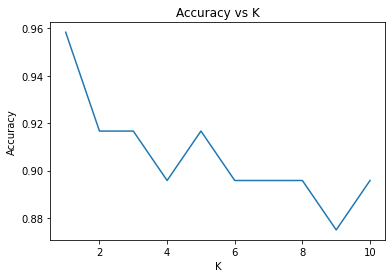

In [224]:
plt.plot([i for i in range(1, 11)], acc)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.show()


In [225]:
model = KNeighborsClassifier(n_neighbors=8)
model.fit(x_train, y_train)
preds = model.predict(x_test)


In [226]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds, labels=[1, 0])
print(cm)


[[8 0]
 [0 4]]


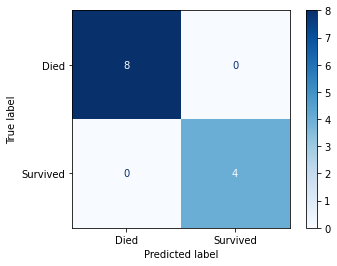

In [227]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=['Died', 'Survived'])
display.plot(cmap="Blues")